In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [9]:
df.shape

(3825, 23)

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,super built up area 3200(297.29 sq.m.)carpet a...,3,4,3+,...,3200.0,NaN,3156.000000,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8137.0,1450.0,super built up area 1450(134.71 sq.m.)built up...,2,2,3,...,1450.0,1400.0,1000.000000,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5305.0,1338.0,super built up area 1342(124.68 sq.m.)carpet a...,2,2,2,...,1342.0,NaN,810.000000,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5463.0,366.0,carpet area: 366.08 (34.01 sq.m.),1,1,1,...,NaN,NaN,366.080239,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,1950.0,super built up area 1950(181.16 sq.m.),3,4,3,...,1950.0,NaN,NaN,0,1,0,0,0,0,165


In [11]:
df.duplicated().sum() # duplicate rows can create a bias

np.int64(126)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(3699, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3699 entries, 0 to 3824
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3699 non-null   object 
 1   society              3698 non-null   object 
 2   sector               3699 non-null   object 
 3   price                3682 non-null   float64
 4   price_per_sqft       3682 non-null   float64
 5   area                 3682 non-null   float64
 6   areaWithType         3699 non-null   object 
 7   bedRoom              3699 non-null   int64  
 8   bathroom             3699 non-null   int64  
 9   balcony              3699 non-null   object 
 10  floorNum             3679 non-null   float64
 11  facing               2646 non-null   object 
 12  agePossession        3699 non-null   object 
 13  super_built_up_area  1876 non-null   float64
 14  built_up_area        1707 non-null   float64
 15  carpet_area          1878 non-null   float6

<Axes: xlabel='property_type'>

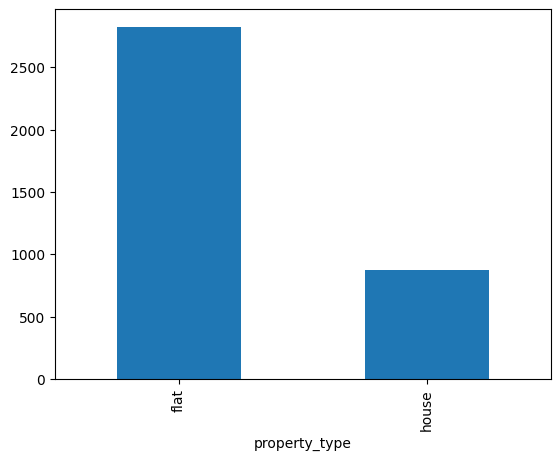

In [17]:
df['property_type'].value_counts().plot(kind ='bar')

## observations
*   Flats are in majority
*   No missing values



In [18]:
df['society'].value_counts().shape # high cardinality

(680,)

In [19]:
df['society'].value_counts()

,count
society,
independent,501
tulip violet,75
ss the leaf,73
shapoorji pallonji joyville gurugram,42
dlf new town heights,42
signature global park,35
shree vardhman victoria,34
smart world orchard,32
emaar mgf emerald floors premier,32


In [22]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023459
ss the leaf,0.046293
dlf new town heights,0.059431
shapoorji pallonji joyville gurugram,0.072568
signature global park,0.083516
shree vardhman victoria,0.094151
smart world orchard,0.104160
emaar mgf emerald floors premier,0.114170
paras dews,0.123866


In [ ]:
# top 75 flats contribute 50%

In [24]:
society_counts = df['society'].value_counts()
frquency_bins = {
    'very high (>100)' : (society_counts > 100).sum(),
    'high (50-100)' : ((society_counts <= 100) & (society_counts >= 50)).sum(),
    'Average (10-49)' : ((society_counts < 49) & (society_counts >= 10)).sum(),
    'low (2-9)' : ((society_counts > 1) & (society_counts < 10)).sum(),
    'very low (1)' : (society_counts == 1).sum()
}

In [25]:
frquency_bins

{'very high (>100)': np.int64(1),
 'high (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'low (2-9)': np.int64(275),
 'very low (1)': np.int64(310)}

<Axes: xlabel='society'>

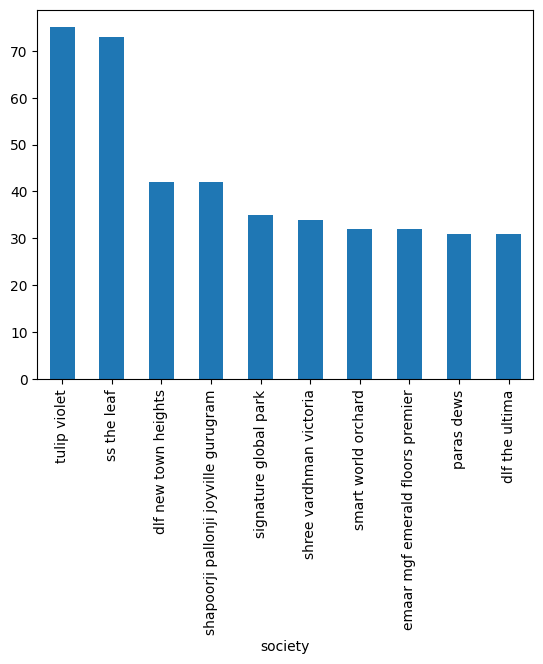

In [26]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar') # top 10

In [27]:
df['society'].isnull().sum()

np.int64(1)

In [28]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2064,flat,NaN,sector 78,0.6,3692.0,1625.0,built up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


### observations


*  Around 13% properties comes under independent tag
*  There are 675 societies
*  The top 75 societies have 50 percent of the properties and the rest 50% come under the remaining 600 societies
  *   Very high -> only one society have more than 100 listings
  *   High -> 2 societies have between 50 to 100 listings
  *   Average -> 92 societies fall in this range 10-49 listings
  * Low -> 273 societies have between 2-9 listings
  * Very Low -> 308 societies have only one listing
*   1 missing value


In [29]:
df['sector'].value_counts().shape # high cardinality

(98,)

<Axes: xlabel='sector'>

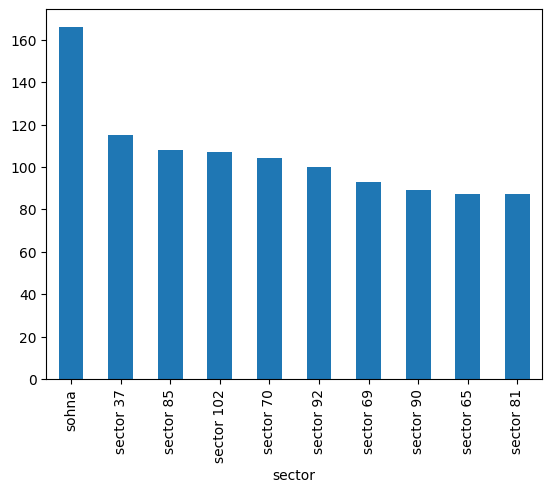

In [30]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind = 'bar')

In [32]:
# frequency distribution for sectors
sector_counts = df['sector'].value_counts()
sector_frequency_bins = {
    'very high (>100)' : (sector_counts > 100).sum(),
    'high (50-100)' : ((sector_counts <= 100) & (sector_counts >= 50)).sum(),
    'Average (10-49)' : ((sector_counts < 49) & (sector_counts >= 10)).sum(),
    'low (2-9)' : ((sector_counts > 1) & (sector_counts < 10)).sum(),
    'very low (1)' : (sector_counts == 1).sum()
}
sector_frequency_bins

{'very high (>100)': np.int64(5),
 'high (50-100)': np.int64(24),
 'Average (10-49)': np.int64(53),
 'low (2-9)': np.int64(15),
 'very low (1)': np.int64(0)}

In [33]:
# output col
df['price'].isnull().sum() # 17 missing values

np.int64(17)

In [34]:
df['price'].describe() # high std -> high variance

,price
count,3682.000000
mean,2.530008
std,2.978231
min,0.070000
25%,0.950000
50%,1.515000
75%,2.750000
max,31.500000


<Axes: xlabel='price', ylabel='Count'>

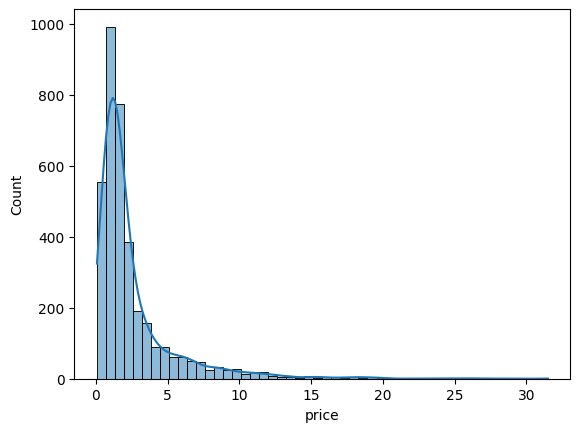

In [35]:
sns.histplot(df['price'], kde = True, bins=50) # right skewed

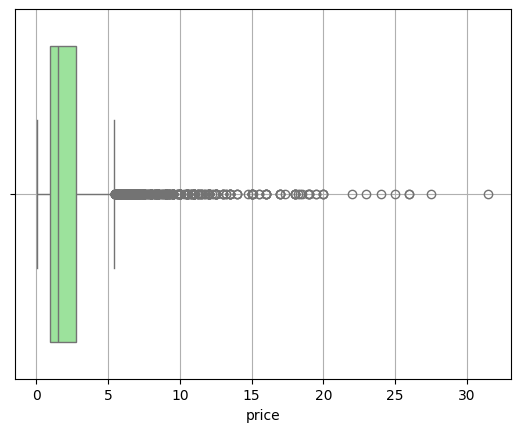

In [37]:
sns.boxplot(x = df['price'], color = 'lightgreen')
plt.grid() # according to box plot properties above 5cr are outliers

In [38]:
# skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(f'Skewness: {skewness}') # data is skewed (positive skew)
print(f'Kurtosis: {kurtosis}') # kurtosis value > 3 indicates that we have outliers

Skewness: 3.2757867362727935
Kurtosis: 14.913074660275663


In [39]:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.176


In [40]:
# identify outliers using IQR
q1 = df['price'].describe()['25%']
q3 = df['price'].describe()['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [41]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape # 428 outliers

(428, 23)

In [42]:
outliers['price'].describe() # avg cost of outliers is 9cr

,price
count,428.000000
mean,9.225093
std,4.055329
min,5.460000
25%,6.455000
50%,8.000000
75%,10.607500
max,31.500000


<Axes: xlabel='price'>

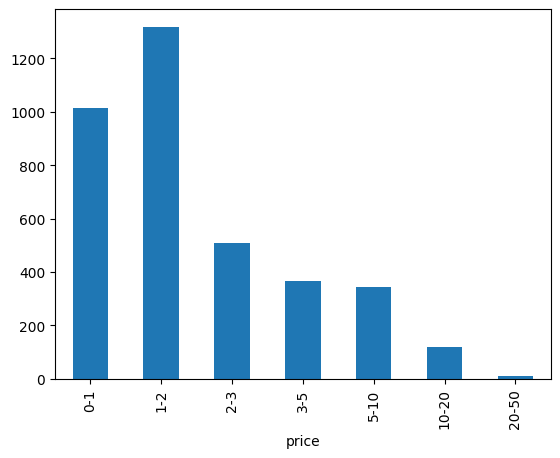

In [44]:
# price binning
bins = [0,1,2,3,5,10,20,50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']
pd.cut(df['price'],bins=bins,labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

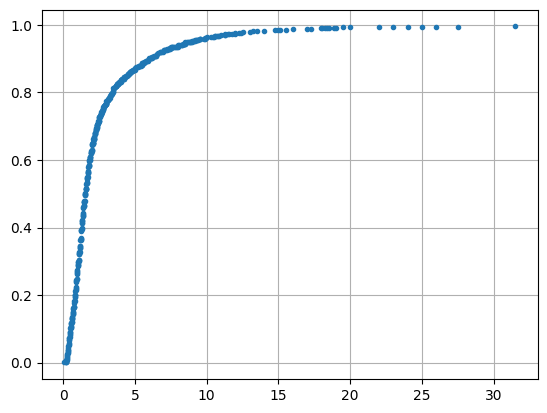

In [45]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = 'none')
plt.grid()

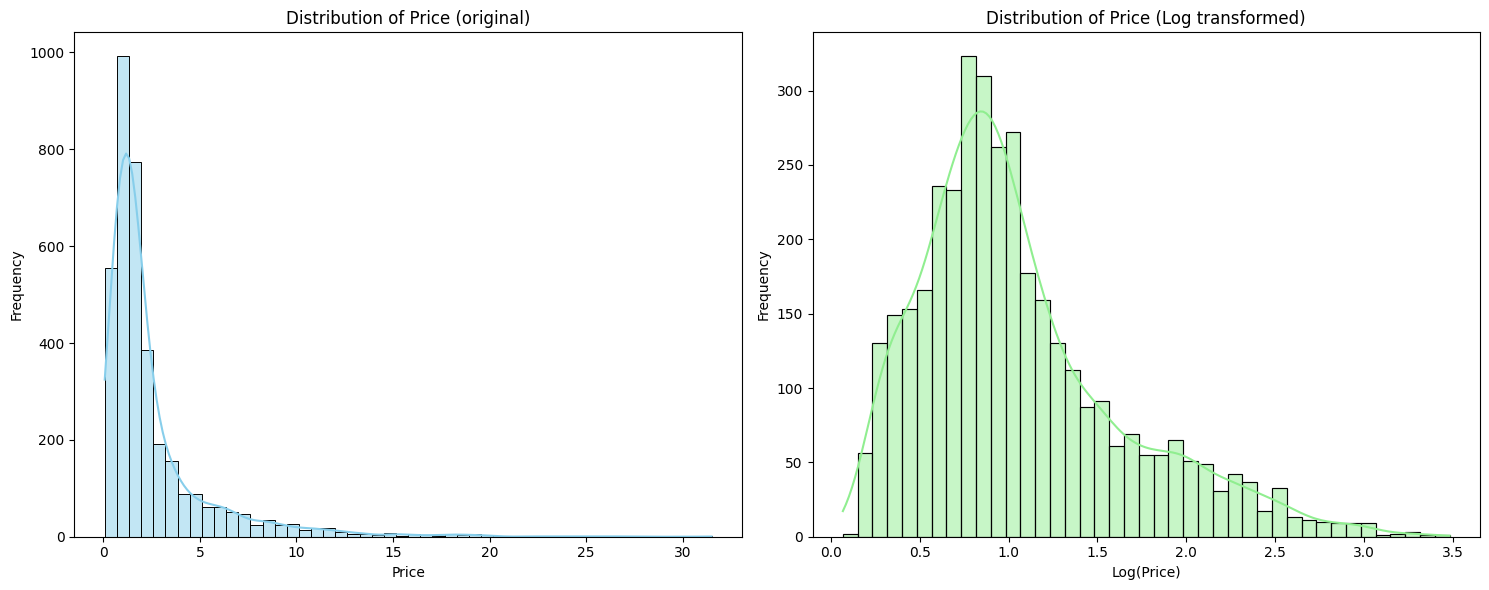

In [49]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.histplot(df['price'], kde = True, bins=50, color = 'skyblue')
plt.title('Distribution of Price (original)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
# log1p calculates log of 1 + x also it handles values which are close to 0
sns.histplot(x = np.log1p(df['price']), kde = True, color = 'lightgreen') #  log1p to avoid -ve values
plt.title('Distribution of Price (Log transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [50]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0728791714415717 0.9583813703240649


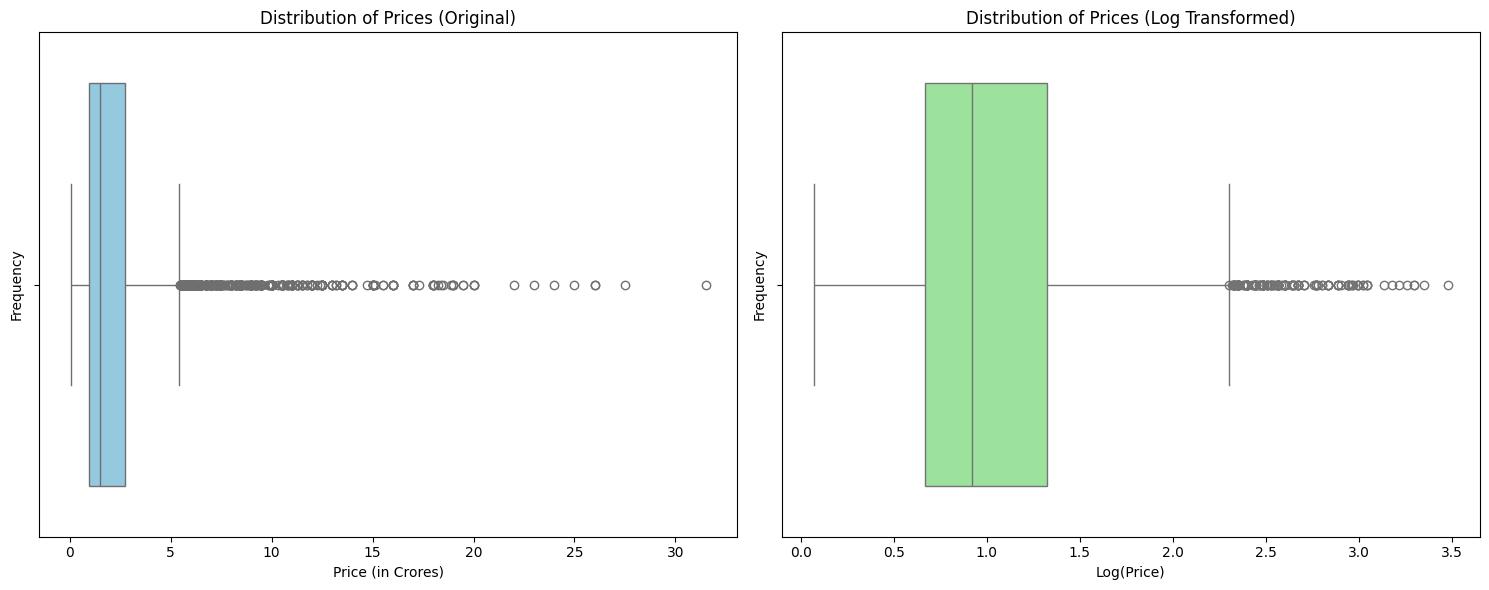

In [54]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [56]:
df['price_per_sqft'].isnull().sum() # 17 missing values

np.int64(17)

In [58]:
# std is very high -> very high variability
# min->4 rs per sqft
# max->6 lakhs per sqft
df['price_per_sqft'].describe()

,price_per_sqft
count,3682.000000
mean,13931.310701
std,23315.369323
min,4.000000
25%,6812.250000
50%,9013.500000
75%,13877.250000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

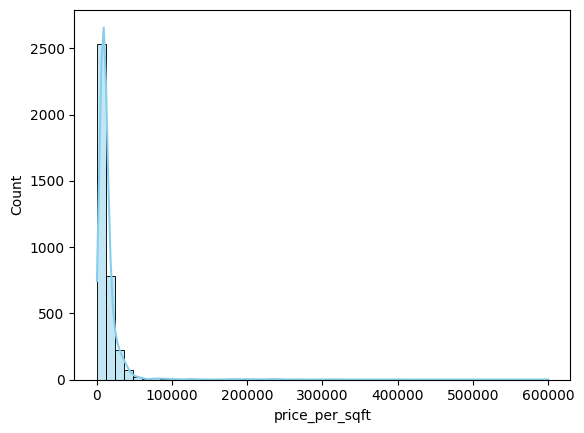

In [59]:
sns.histplot(x = df['price_per_sqft'], bins = 50, color = 'skyblue', kde = True) # right skewed

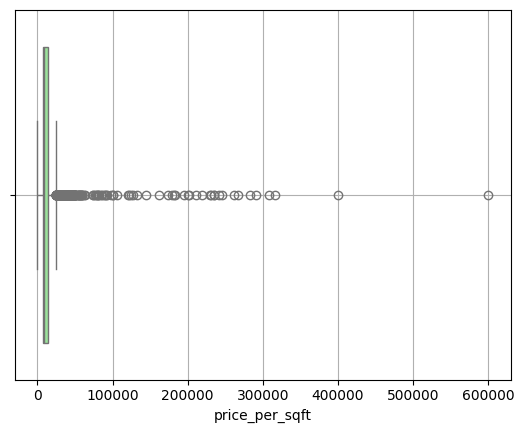

In [62]:
sns.boxplot(x=df['price_per_sqft'], color = 'lightgreen') # several outliers on higher side, IQR is compact
plt.grid()

In [63]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

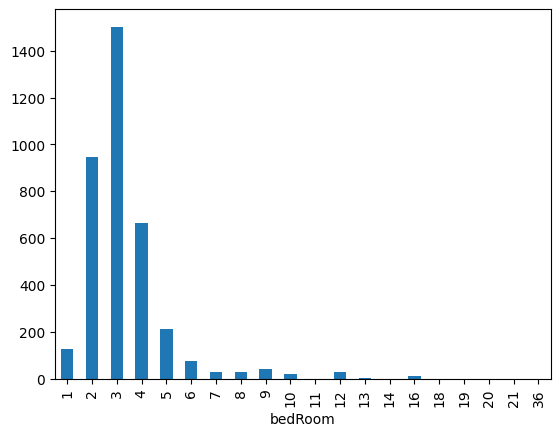

In [64]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

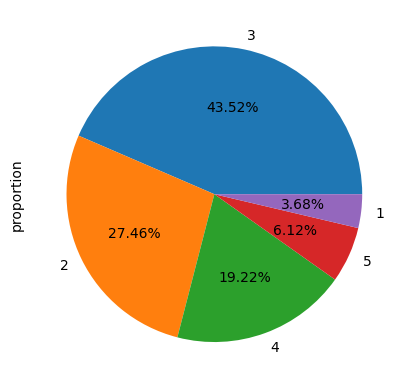

In [73]:
df['bedRoom'].value_counts(normalize = True).head().plot(kind='pie', autopct='%0.2f%%')

In [67]:
df['bathroom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

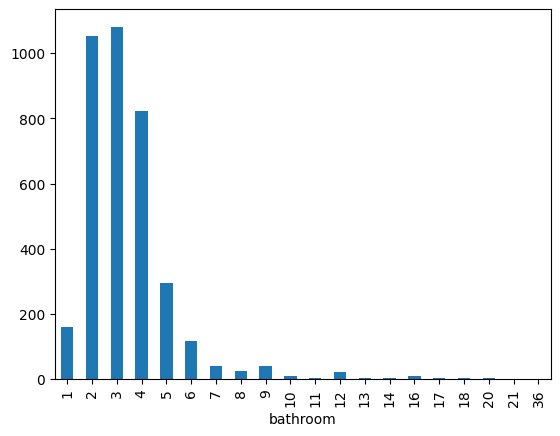

In [74]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

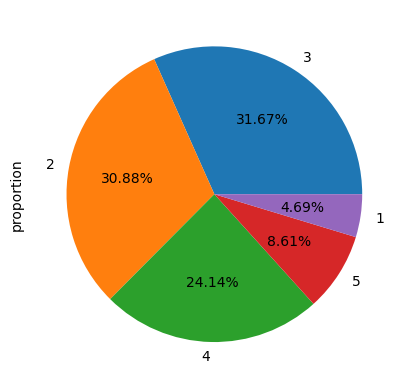

In [75]:
df['bathroom'].value_counts(normalize = True).head().plot(kind='pie', autopct='%0.2f%%')

In [76]:
df['balcony'].isnull().sum()

np.int64(0)

<Axes: xlabel='balcony'>

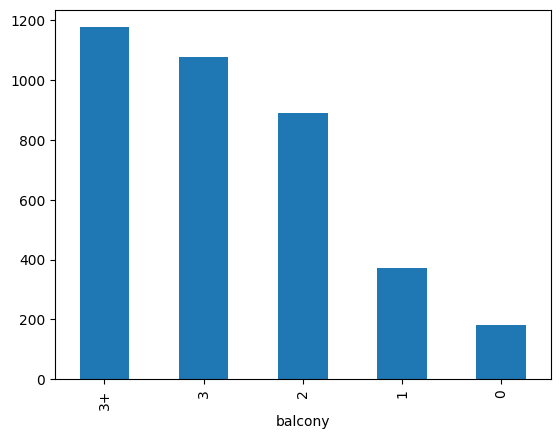

In [77]:
df['balcony'].value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

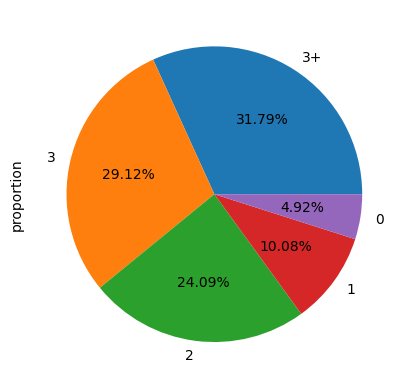

In [78]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [80]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,3.0,North-East,Old Property,3200.0,NaN,3156.000000,0,1,0,1,0,1,143
1,7.0,East,New Property,1450.0,1400.0,1000.000000,0,0,0,1,0,0,140
2,6.0,North-West,Relatively New,1342.0,NaN,810.000000,1,0,0,0,0,0,108
3,10.0,West,Relatively New,NaN,NaN,366.080239,0,0,0,0,0,0,82
4,4.0,East,Relatively New,1950.0,NaN,NaN,0,1,0,0,0,0,165


In [81]:
df['floorNum'].isnull().sum()

np.int64(20)

In [82]:
df['floorNum'].describe()

,floorNum
count,3679.000000
mean,6.698559
std,5.930463
min,-1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,45.000000


<Axes: xlabel='floorNum'>

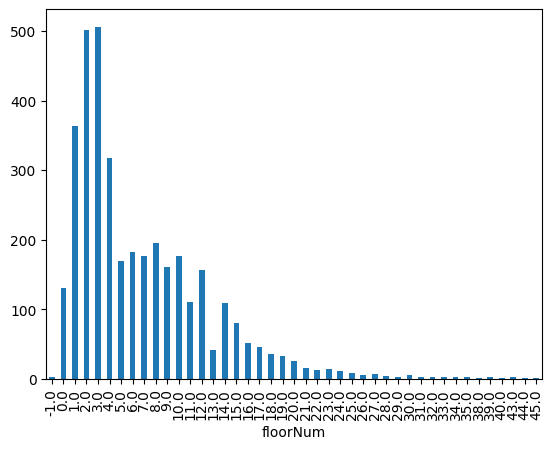

In [83]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

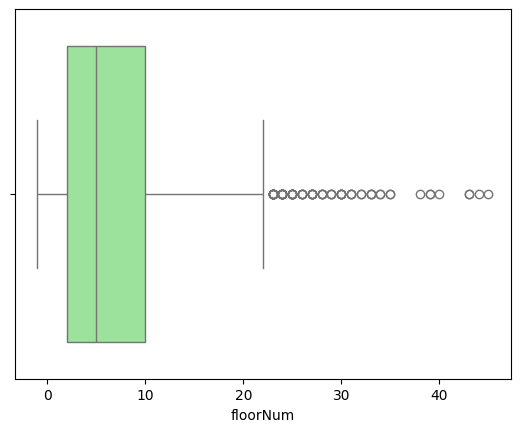

In [85]:
sns.boxplot(x=df['floorNum'], color='lightgreen')

* The majority of the properties lie between the ground floor (0) and the 25th floor.
* Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
* There are a few properties located at higher floors, but their frequency is much lower.
* The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
* Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.



In [ ]:
# facing

In [86]:
df['facing'].isnull().sum()

np.int64(1053)

In [87]:
df['facing'].fillna('NA',inplace=True)

<ipython-input-87-e6ba103970bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [88]:
df['facing'].value_counts()

,count
facing,
NA,1053
East,630
North-East,624
North,389
West,249
South,232
North-West,194
South-East,174
South-West,154


In [89]:
# age possession

In [90]:
df['agePossession'].isnull().sum()

np.int64(0)

In [91]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1651
New Property,594
Moderately Old,569
Undefined,310
Old Property,309
Under Construction,266


In [92]:
# area

In [93]:
# super built up area
df['super_built_up_area'].isnull().sum() #50% values are missing

np.int64(1823)

In [94]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1876.000000
mean,1924.523214
std,764.594764
min,89.000000
25%,1478.750000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

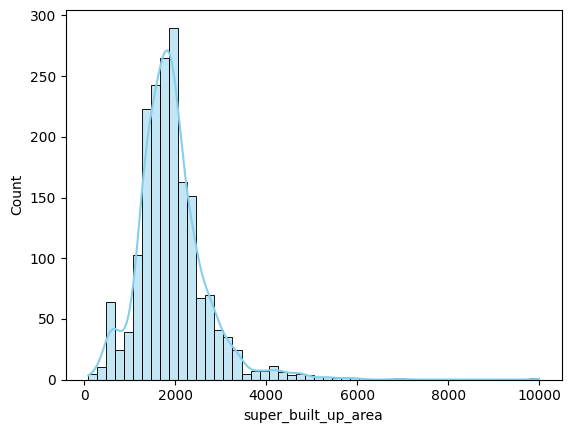

In [95]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

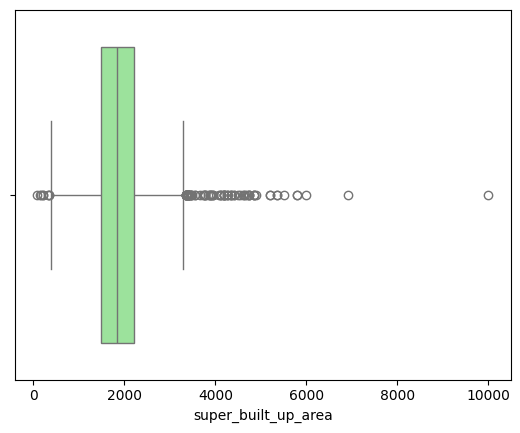

In [97]:
sns.boxplot(x=df['super_built_up_area'].dropna(), color='lightgreen')

* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [98]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(1992)

In [99]:
df['built_up_area'].describe()

,built_up_area
count,1707.000000
mean,2383.354792
std,17863.017553
min,14.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

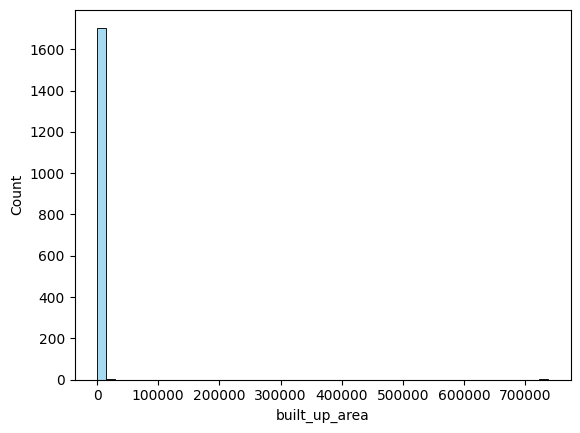

In [100]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

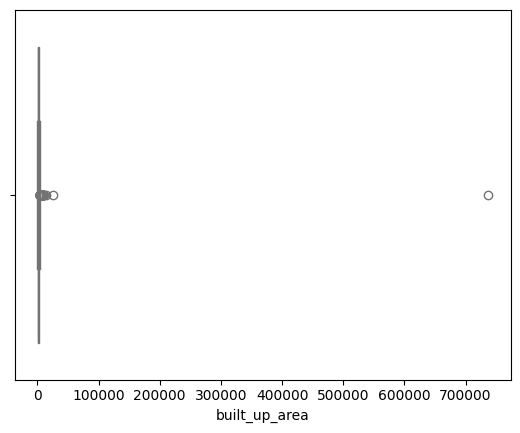

In [101]:
sns.boxplot(x=df['built_up_area'].dropna(), color='lightgreen') # outlier

In [ ]:
# carpet area

In [102]:
df['carpet_area'].isnull().sum()

np.int64(1821)

In [103]:
df['carpet_area'].describe()

,carpet_area
count,1878.000000
mean,2524.991500
std,22763.570259
min,15.000000
25%,835.470000
50%,1300.000000
75%,1788.750000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

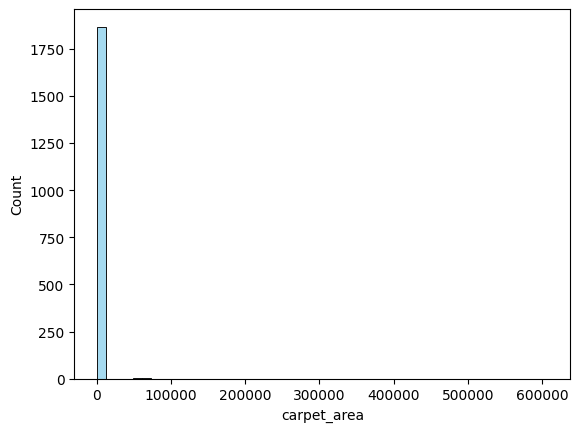

In [104]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

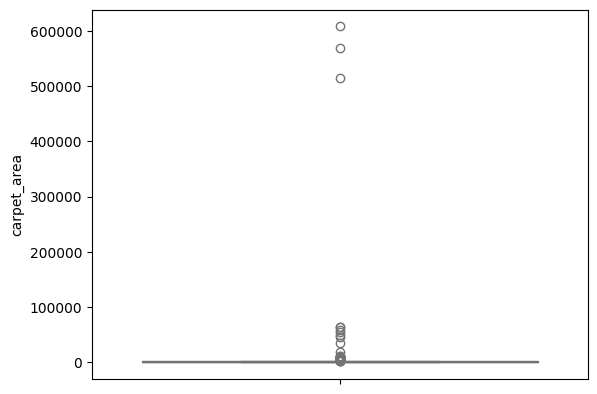

In [105]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [106]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,1,0,1,0,1,143
1,0,0,0,1,0,0,140
2,1,0,0,0,0,0,108
3,0,0,0,0,0,0,82
4,0,1,0,0,0,0,165
5,0,0,0,0,0,0,106
6,0,1,0,0,1,1,8
7,0,0,1,1,0,0,8
8,0,1,0,1,0,1,165
9,0,0,0,0,0,0,0


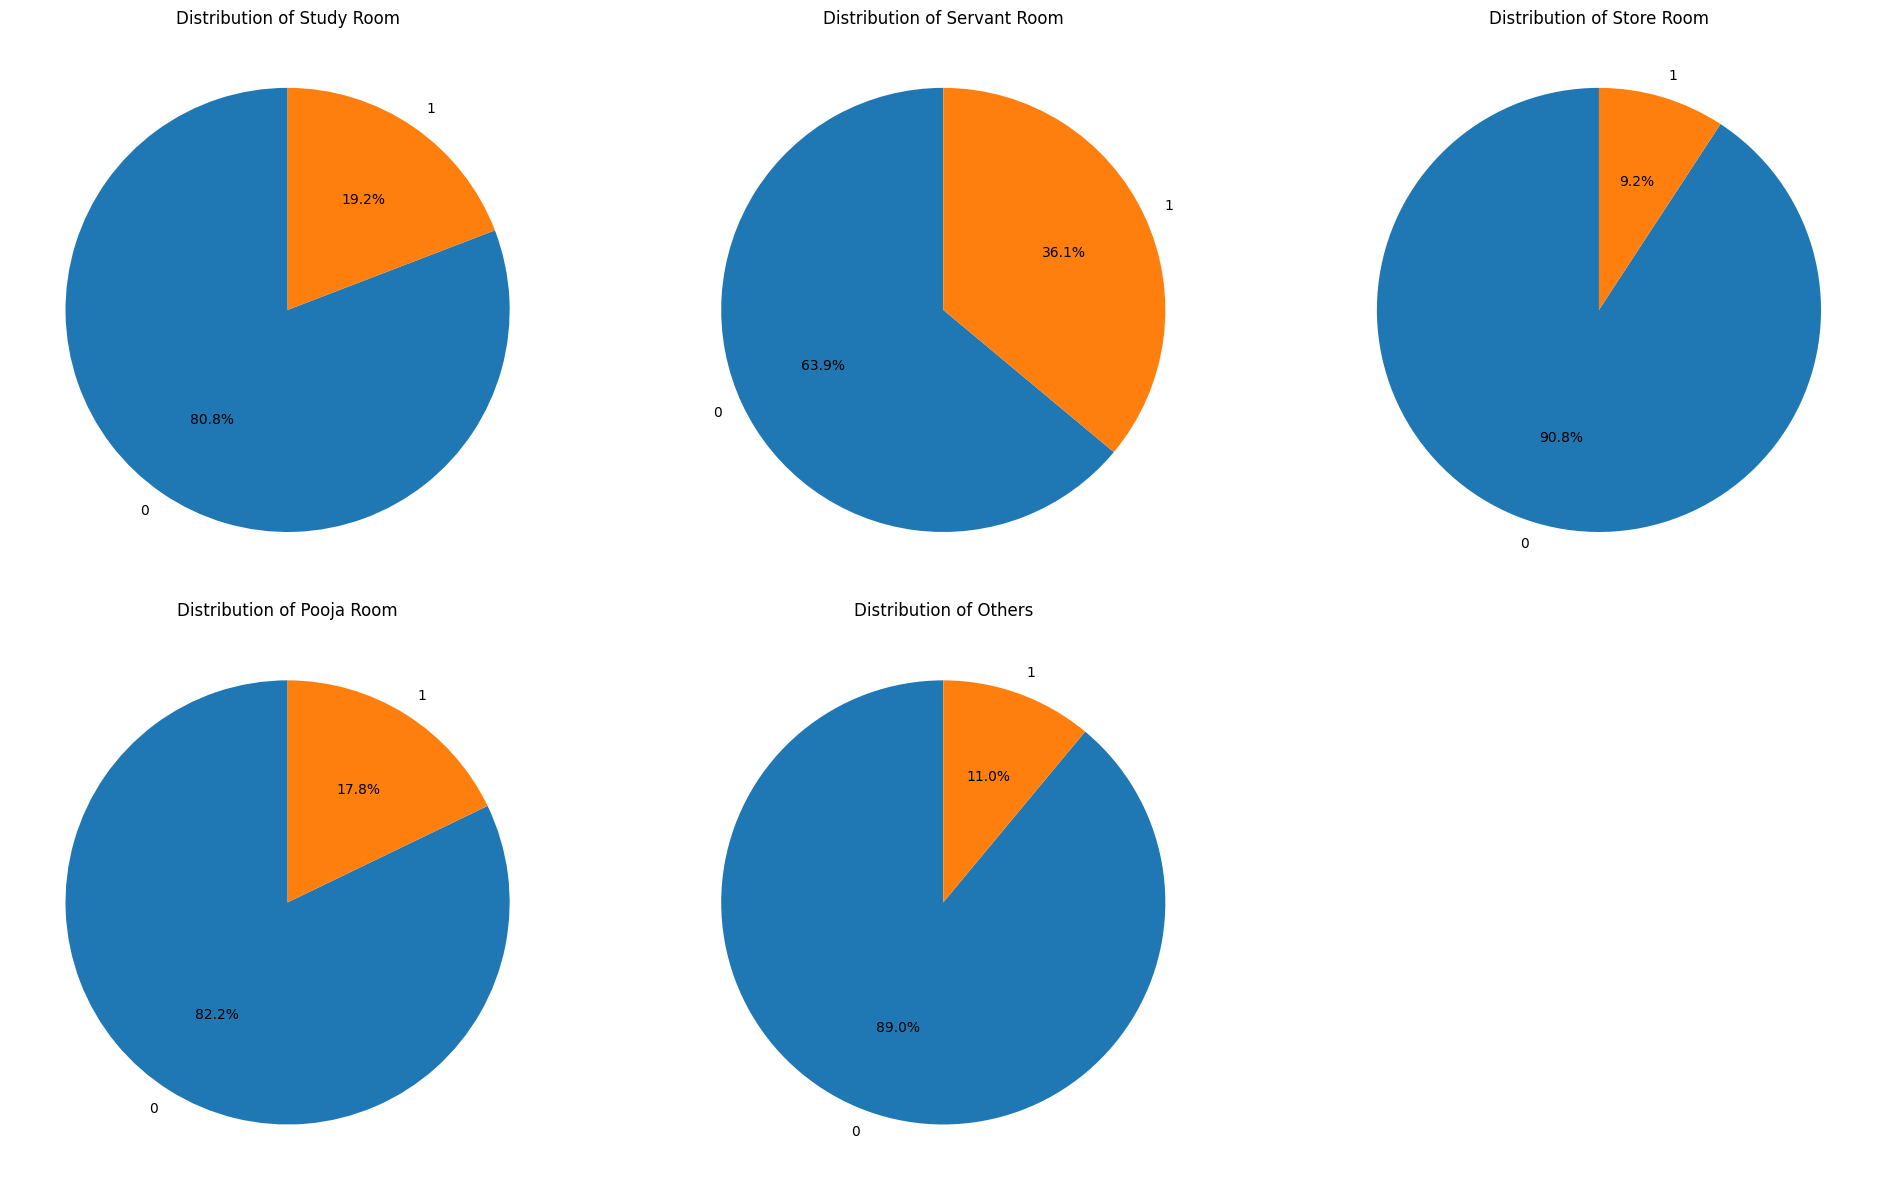

In [107]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [108]:
df['furnishing_type'].value_counts()
# 0 -> unfurnished
# 1-> semi furished
# 2 -> furnished

,count
furnishing_type,
0,2703
1,798
2,198


<Axes: ylabel='count'>

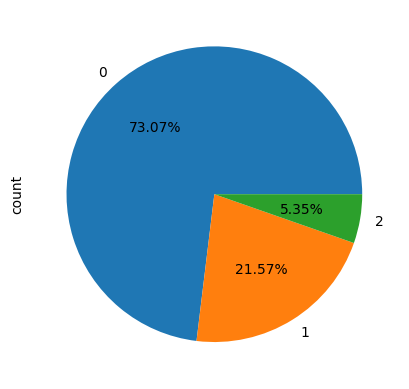

In [109]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [110]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [111]:
df['luxury_score'].describe()

,luxury_score
count,3699.000000
mean,71.206542
std,53.098789
min,0.000000
25%,31.000000
50%,58.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

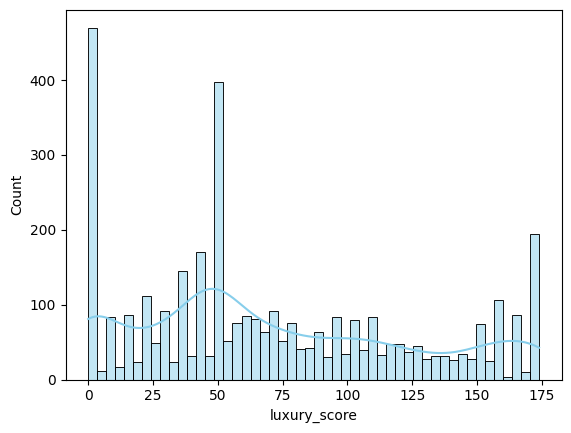

In [112]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True) # multi modal distribution

<Axes: xlabel='luxury_score'>

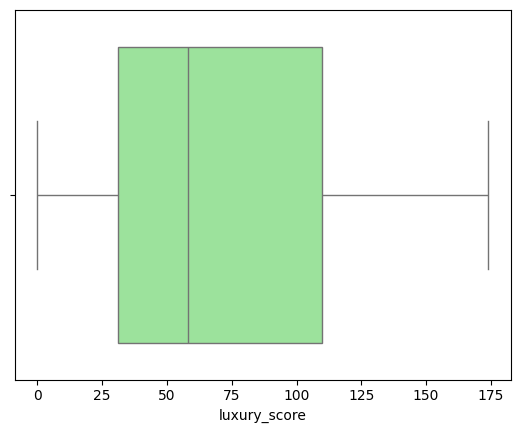

In [115]:
sns.boxplot(x=df['luxury_score'], color='lightgreen')